In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from KNN import KNN
 
%matplotlib inline 
import seaborn as sns 

train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
abc=pd.read_csv("gender_submission.csv")

above is, importing the various libraris required for the program and opening the csv file using pandas libraries

PRE-PROCESSING THE DATA OF THE FILE

In [2]:
train.head()
#it print the 1st five values of data stored in train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.describe()
#it describe the data stored in train like count,mean etc

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.isnull().sum()
#it will sum/count all the nan values present in train dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we have to remove null values from the data, in numerical values mean will be used and in categorical values we can give values as the most used category 

1. In Age, I will use mean. so, in this I will replace NaN value with mean at the same place instead of making new column

In [5]:
train["Age"]=train["Age"].replace(np.NaN,train["Age"].mean())
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test["Age"]=test["Age"].replace(np.NaN,test["Age"].mean())
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

we will drop passenger id as we dont need it as a classification factor

In [7]:
train=train.drop(["PassengerId"],axis=1)
test=test.drop(["PassengerId"],axis=1)
train.columns.values # it will print all columns name

array(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [8]:
train.describe()
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

now we will process Embarked, since it is categorical data so we will replace nan values with top most category 

In [10]:
train["Embarked"].describe() # on running this statement will get to know the "s" is top category 

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [11]:
train["Embarked"]=train["Embarked"].replace(np.NaN,'S') # here nan value is replaced with S
train["Embarked"].isnull().sum()

0

now,we will check for fare , and replace the nan data with mean, in this test data has nan values and train data has no nan value so we will process test only there statement is being run below .isnull.sum()

In [12]:
test["Fare"].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [13]:
test["Fare"].isnull().sum()

1

In [14]:
train["Fare"].isnull().sum()

0

In [15]:
test["Fare"]=test["Fare"].replace(np.nan,test["Fare"].mean()) # here nan value is replaced with mean of fare coloumn values
test["Fare"].isnull().sum()

0

in order to use string data as factor for classification we will convert it to integer, the data which 
has some classes/classification like sex=male,female we can put value as 0,1 respectively
and some other  columns but value which has too much unique numbers will be dropped.

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [17]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
train["Embarked"].describe()


count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

so in Embarked coloumn we have three categories so we can use dictionary in order to map these oject value with some integer value in order to convert from object type.

In [19]:
train["Embarked"].head() # running this statement we get 1st five values and in the ouput we get two categories only, s,c


0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [20]:
train["Embarked"].head(20) # now we print 1st 20 lines and check for third category
# nad yes, we found third category "Q"

0     S
1     C
2     S
3     S
4     S
5     Q
6     S
7     S
8     S
9     C
10    S
11    S
12    S
13    S
14    S
15    S
16    Q
17    S
18    S
19    C
Name: Embarked, dtype: object

In [21]:
Embarked_dict={"S":0,"C":1,"Q":2} # here  dictionry which is like map of cpp is described i.e. we defined the value of S with 0, c with 1 and q with 2
train["Embarked"]=train["Embarked"].map(Embarked_dict) # embarked coloumn values are mapped with dictionary and S will now become 0,q will become 2, c will be 1
test["Embarked"]=test["Embarked"].map(Embarked_dict)
train["Embarked"].head(20) # here we printed the data  in order to check whether it is done or not

0     0
1     1
2     0
3     0
4     0
5     2
6     0
7     0
8     0
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    2
17    0
18    0
19    1
Name: Embarked, dtype: int64

In [22]:
test["Embarked"].head(20) #above was train data, now we print test data

0     2
1     0
2     2
3     0
4     0
5     0
6     2
7     0
8     1
9     0
10    0
11    0
12    0
13    0
14    0
15    1
16    2
17    1
18    0
19    1
Name: Embarked, dtype: int64

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [24]:
Sex_dict={"male":0,"female":1} # same thng is done with sex coloumn and values are mapped in both dataset
train["Sex"]=train["Sex"].map(Sex_dict)
test["Sex"]=test["Sex"].map(Sex_dict)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


we are left with three object type ticket,cabin,name
now we go for ticket.

In [26]:
train["Ticket"].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

in ticket there are 681 unique identities, so we can not map it with dictionary, so I will drop it, as if there is so much uniqueness , so there will be no pattern and hence there will be no relation with the classification of survival, non survival

In [27]:
train=train.drop(["Ticket"],axis=1)# here ticket coloumn is dropped 

train.columns.values # we can heck this thing by printing coloumn names in dataset

array(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked'], dtype=object)

In [28]:
test.columns.values

array(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'], dtype=object)

so, in the test data also there is ticket option so we wil remove the coloumn named ticket

In [29]:
test=test.drop(["Ticket"],axis=1)
test.columns.values

array(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'], dtype=object)

In [30]:
train["Name"].describe() #no we will process name coloumn

count                         891
unique                        891
top       Braund, Mr. Owen Harris
freq                            1
Name: Name, dtype: object

here,according to me name also does not play any significant role in survival or death of passenger as the data about male and female is already with us

In [31]:
train=train.drop(["Name"],axis=1) 
test=test.drop(["Name"],axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,NaN,0
1,1,1,1,38.0,1,0,71.2833,C85,1
2,1,3,1,26.0,0,0,7.9250,NaN,0
3,1,1,1,35.0,1,0,53.1000,C123,0
4,0,3,0,35.0,0,0,8.0500,NaN,0


In [32]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,0,34.5,0,0,7.8292,NaN,2
1,3,1,47.0,1,0,7.0000,NaN,0
2,2,0,62.0,0,0,9.6875,NaN,2
3,3,0,27.0,0,0,8.6625,NaN,0
4,3,1,22.0,1,1,12.2875,NaN,0


In [33]:
test.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.363636,30.272590,0.447368,0.392344,35.627188,0.464115
std,0.841838,0.481622,12.634534,0.896760,0.981429,55.840500,0.685516
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,0.000000,30.272590,0.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000,1.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Cabin     91 non-null     object 
 7   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 26.2+ KB


we have two float data type, one factor is age,which should be integer.and are can be in float but fare value can be float, as otherwise this will make calculation easy.

In [35]:
test['Age']=test["Age"].astype(int) # this is used to convert te datatype to int
test["Age"].info()


<class 'pandas.core.series.Series'>
RangeIndex: 418 entries, 0 to 417
Series name: Age
Non-Null Count  Dtype
--------------  -----
418 non-null    int32
dtypes: int32(1)
memory usage: 1.8 KB


In [36]:
train['Age']=train["Age"].astype(int) 
train["Age"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype
--------------  -----
891 non-null    int32
dtypes: int32(1)
memory usage: 3.6 KB


In [37]:
train['Fare']=train["Fare"].astype(int)
test['Fare']=test["Fare"].astype(int)
train["Fare"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Fare
Non-Null Count  Dtype
--------------  -----
891 non-null    int32
dtypes: int32(1)
memory usage: 3.6 KB


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    int64 
 3   Age       891 non-null    int32 
 4   SibSp     891 non-null    int64 
 5   Parch     891 non-null    int64 
 6   Fare      891 non-null    int32 
 7   Cabin     204 non-null    object
 8   Embarked  891 non-null    int64 
dtypes: int32(2), int64(6), object(1)
memory usage: 55.8+ KB


In [39]:
train['Cabin'].describe # now we will process cabin coloumn

<bound method NDFrame.describe of 0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object>

In [40]:
train['Cabin'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
204 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [41]:
train['Cabin'].head(40) #here 1st 40 values are printed

0             NaN
1             C85
2             NaN
3            C123
4             NaN
5             NaN
6             E46
7             NaN
8             NaN
9             NaN
10             G6
11           C103
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            D56
22            NaN
23             A6
24            NaN
25            NaN
26            NaN
27    C23 C25 C27
28            NaN
29            NaN
30            NaN
31            B78
32            NaN
33            NaN
34            NaN
35            NaN
36            NaN
37            NaN
38            NaN
39            NaN
Name: Cabin, dtype: object

In [42]:
train["Cabin"].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

so on running train['Cabin'].head(40) we get to know about a,b,c,d,e values are common but number after that are ranging, so we will make new column having 
information scrapped from these cabin cloumn values, having values a,b,c,d,e ;as  it is categorical data and the top info is not with us so we will use one  different category to show nan values

In [43]:
train['Cabin']=train['Cabin'].replace(np.NAN,"N") # here nan values in cabin coloumn is replaced with N
test['Cabin']=test['Cabin'].replace(np.nan,"N")
train['Cabin'].head(20)
 

0        N
1      C85
2        N
3     C123
4        N
5        N
6      E46
7        N
8        N
9        N
10      G6
11    C103
12       N
13       N
14       N
15       N
16       N
17       N
18       N
19       N
Name: Cabin, dtype: object

In [44]:

import re

Cabin_dict = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6, "N": 7,"T":8} # here again dictionary is defined
train['Cabin_sec'] = train['Cabin'].replace(Cabin_dict, regex=True) # in this line we will get the values from cabin coloumn and replace it with values according to cabin_dict
test['Cabin_sec'] = test['Cabin'].replace(Cabin_dict, regex=True)


In [45]:


train['Cabin_sec'].describe()

count    891.000000
mean       5.945006
std        2.063134
min        0.000000
25%        7.000000
50%        7.000000
75%        7.000000
max        8.000000
Name: Cabin_sec, dtype: float64

In [46]:
train['Cabin_sec'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Cabin_sec
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [47]:
train['Cabin_sec'].head(20)

0     7
1     2
2     7
3     2
4     7
5     7
6     4
7     7
8     7
9     7
10    6
11    2
12    7
13    7
14    7
15    7
16    7
17    7
18    7
19    7
Name: Cabin_sec, dtype: int64

In [48]:
test['Cabin_sec'].isnull().sum()

0

In [49]:
train['Cabin_sec'].unique()

array([7, 2, 4, 6, 3, 0, 1, 5, 8], dtype=int64)

now we had derived info from cabin column so we can drop it now.

In [50]:
train=train.drop(["Cabin"],axis=1)
test=test.drop(["Cabin"],axis=1)
train.columns.values


array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Cabin_sec'], dtype=object)

In [51]:
test.columns.values

array(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Cabin_sec'], dtype=object)

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Survived   891 non-null    int64
 1   Pclass     891 non-null    int64
 2   Sex        891 non-null    int64
 3   Age        891 non-null    int32
 4   SibSp      891 non-null    int64
 5   Parch      891 non-null    int64
 6   Fare       891 non-null    int32
 7   Embarked   891 non-null    int64
 8   Cabin_sec  891 non-null    int64
dtypes: int32(2), int64(7)
memory usage: 55.8 KB


In [53]:
train['Age'].head(30)

0     22
1     38
2     26
3     35
4     35
5     29
6     54
7      2
8     27
9     14
10     4
11    58
12    20
13    39
14    14
15    55
16     2
17    29
18    31
19    29
20    35
21    34
22    15
23    28
24     8
25    38
26    29
27    19
28    29
29    29
Name: Age, dtype: int32

my accuracy was less so I furthur processed the data where age,fare is divided into ranges 

In [54]:
age_range = [0, 11, 20, 30, 40, 50, 60, 70, float('inf')] #here age range is taken
age_range_dict = [0, 1, 2, 3, 4, 5, 6, 7] # wrt to age range the dictionary of mapping values are defined

# now we will have bins described in age range in which value between 0,10 are mapped with 1, here right=False means rightmost value is not included in range
# and Include_lowest=true means lowest value of range sholud be part of range wrt to defined mapping
train['Age'] = pd.cut(train['Age'], bins=age_range, labels=age_range_dict, right=False, include_lowest=True).astype(int)
test['Age'] = pd.cut(test['Age'], bins=age_range, labels=age_range_dict, right=False, include_lowest=True).astype(int)
train['Age'].head(30)

0     2
1     3
2     2
3     3
4     3
5     2
6     5
7     0
8     2
9     1
10    0
11    5
12    2
13    3
14    1
15    5
16    0
17    2
18    3
19    2
20    3
21    3
22    1
23    2
24    0
25    3
26    2
27    1
28    2
29    2
Name: Age, dtype: int32

In [55]:
fare_range = [0,20, 40, 70, 100, 250, float('inf')] # same thing is done with fare
fare_range_dict = [0, 1, 2, 3, 4, 5]

train['Fare'] = pd.cut(train['Fare'], bins=fare_range , labels=fare_range_dict , right=False, include_lowest=True).astype(int)
test['Fare'] = pd.cut(test['Fare'], bins=fare_range , labels=fare_range_dict , right=False, include_lowest=True).astype(int)

In [56]:
train.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Cabin_sec'], dtype=object)

In [57]:
test.columns.values

array(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Cabin_sec'], dtype=object)

now we have processed tha data and converted each column to int and removed all the nan values 

In [58]:
X_train=train.iloc[:, [1,2,3,4,5,6,7,8]].values  #now test ,train defination is done like train_test split is done. here coloumn having index 1,2,3,5,4,6,7,8 a
                                                 #are part of X_train model i.e. values in these coloumn will be the features for governing the result
y_train= train.iloc[:, 0].values   # valuesin cloumn 0 is y_train i.e. output for fatures in X_train

In [59]:
X_test= test.iloc[:, [0,1,2,3,4,5,6,7]].values # here values prescribed will be used to calculate the result
y_test=abc.iloc[:,1].values # abc  has the ans which should be equal to predicted_answers from X_test

In [60]:
import numpy as np
def euclidean_distance(x1, x2):
    distance = (np.sum((x1-x2)**2))**0.5
    return distance

class KNN:
    # fom here algorithm starts, it is like constructor in python.as a defalut parameer, self is passed as an argument is is like the object of the class
    # which is object variable used to initialize the data members ,
    # it has default parameter k=3,i.e. although I have passes k value as 5 but if there issomeproblem so it will take k as 3 insead of 5 and start r
    # running the code according to vlaue of k as 3 
    def __init__(self, k):
        self.k = k
    #this is the function fit inorder to fit the values ; what needs to be features for calculation and what is the ans which will be used for learning
    #in this features like age, sex, fare, cabin,embarked are used as x_train which will be used fo calculation 
    #y_train have the values of column survived as 0,1 i.e. person having particular features been part of x-train will get survived or not this information is there in this fit function
    #in a nutshell, it is a training dataset that will help in governing answers for test dataset
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

# in def predict we are calling for calculation initiation for prediction here values of X_test is sent i.e. the values like
#age, sex, fare, cabin,embarked are now calculated in order to chheck or predict whether the information or feature provided about
# a customer is survived or not .so here from complete dataset X_test; single- single datapoints regarding a person is sent to calculate_pointwise
#and answer returned 0,1 will be stored in prediction which is returned back 
    def predict(self, X_test):
        predictions = [self.calculate_pointwise(x) for x in X_test]
        return predictions
# the function calculate_pointwise is called for len(X_test)times and for each dataset there is calculation of euclidean distances wrt X_train 
    def calculate_pointwise(self, x):
        # compute the euclidean distance,here each datapoint in X_train is calculated,ie.e euclidean distance between X(receive from predict function)andx_train is calculated
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # here we will get index of k closest neighbours or datapoints
        k_index = np.argsort(distances)[:self.k]
    # now wrt to indexes of people/passenger their values in y_train is stored in k_nearest_class
        k_nearest_class = [self.y_train[i] for i in k_index]

        #here, this is done ,in order to classify which are most common clas from which the point is related to
        # after that it will find out the index of class with most counts and return it ; which is actually a class from which data set belong to according to identification /classification of knn
       
    
        unique_class, class_counts = np.unique(k_nearest_class, return_counts=True)
        most_common_index = np.argmax(class_counts)
        most_common_class = unique_class[most_common_index]
        return most_common_class

In [61]:
clf = KNN(k=5)  #here we called the knn algorithm where k=5 is sent
clf.fit(X_train, y_train)  #here we called the function fit which will be used like training the model i.e. these values will help in providing the answers for X_test feaures
predictions = clf.predict(X_test) # here predict function is called and X_test values are passed for classification

print(predictions) # final values are printed



[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 

In [62]:
acc = np.sum(predictions == y_test) / len(y_test) # here accuracy is calculated
print(acc)


0.8301435406698564


here I tried to map the data i.e. features with classes 
basically I plotted my predicted valuess in one graph and in another graph I plotted already-provided survived value in the excel sheet 

C:\Users\NIKITA_PC\AppData\Local\Temp\ipykernel_8920\1884523372.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(x, y, label=col,cmap='rainbow')
C:\Users\NIKITA_PC\AppData\Local\Temp\ipykernel_8920\1884523372.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax2.scatter(x, y, label=col,cmap='rainbow')


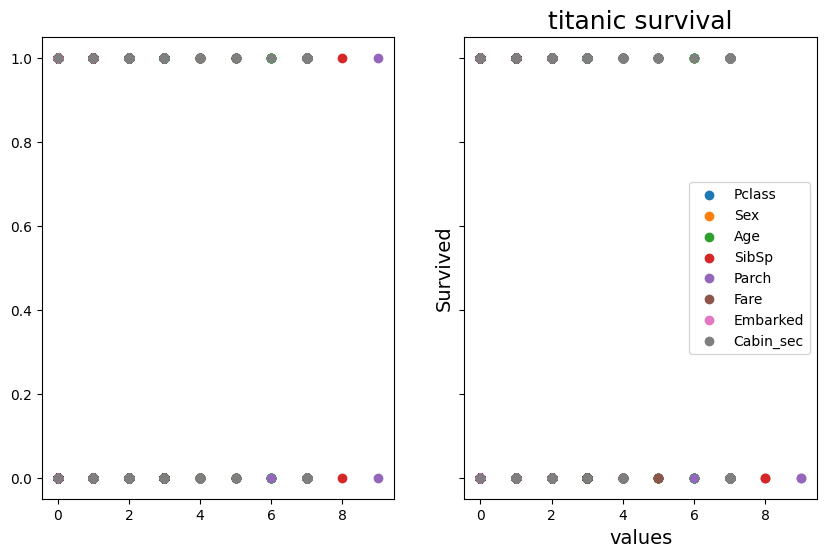

In [63]:
fig , (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize = (10, 6))



columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Cabin_sec']  # all coloumns name will be part of x axix one by one ; done through for-loop

y = abc['Survived'].values  # values provided in excell sheet are y axis

for col in columns:   # here one by one we are taking values from coloumns and ploting it wrt to survived
    x = test[col].values
    ax1.scatter(x, y, label=col,cmap='rainbow')

plt.title('titanic survival', fontsize=18)
plt.xlabel('values', fontsize=14)
plt.ylabel('Survived', fontsize=14)

columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Cabin_sec']

y = np.array(predictions) #values predicted from model are taken into account

for col in columns:
    x = test[col].values
    ax2.scatter(x, y, label=col,cmap='rainbow')

plt.title('titanic survival', fontsize=18)
plt.xlabel('values', fontsize=14)
plt.ylabel('Survived', fontsize=14)
plt.legend()
plt.show()

In [64]:
# this is done to select appropriate k for best accuracy,from k 1 to 40 are calculated and graph is generated for the same 
# value with min error rate are taken into account for max accuracy
error_rate = []
for i in range(1, 40):
    knn = KNN(k=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test)) 
error_rate

[0.35645933014354064,
 0.26555023923444976,
 0.23684210526315788,
 0.22727272727272727,
 0.16985645933014354,
 0.20095693779904306,
 0.16985645933014354,
 0.18660287081339713,
 0.20574162679425836,
 0.1937799043062201,
 0.19617224880382775,
 0.18181818181818182,
 0.18899521531100477,
 0.20334928229665072,
 0.20334928229665072,
 0.19856459330143542,
 0.20095693779904306,
 0.20813397129186603,
 0.20813397129186603,
 0.21291866028708134,
 0.21291866028708134,
 0.21770334928229665,
 0.21770334928229665,
 0.22488038277511962,
 0.22248803827751196,
 0.23205741626794257,
 0.22727272727272727,
 0.22727272727272727,
 0.215311004784689,
 0.21291866028708134,
 0.21770334928229665,
 0.22009569377990432,
 0.21770334928229665,
 0.2511961722488038,
 0.2535885167464115,
 0.25598086124401914,
 0.25598086124401914,
 0.2607655502392344,
 0.2583732057416268]

Text(0, 0.5, 'Error Rate')

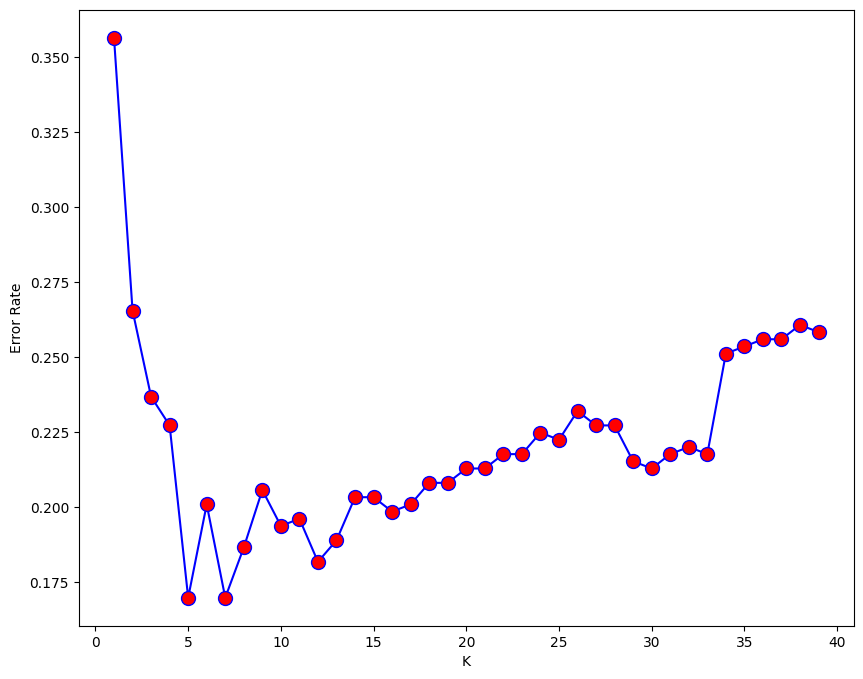

In [65]:
#so here graph is genearated where k from 1 to 40 are plotted with their respective error rate 
plt.figure(figsize=(10, 8))
plt.plot(range(1, 40), error_rate, color='blue', marker='o', markersize = 10, markerfacecolor = 'red')
plt.xlabel("K")
plt.ylabel("Error Rate")

so from above graph we get to know error is smallest with when k=5 or k=7,8 now we test it, inorder to increase accuracy

In [66]:

clf = KNN(k=5)  #here we called the knn algorithm where k=5 is sent
clf.fit(X_train, y_train)  #here we called the function fit which will be used like training the model i.e. these values will help in providing the answers for X_test feaures
predictions = clf.predict(X_test) # here predict function is called and X_test values are passed for classification

print(predictions) # final values are printed


[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 

In [67]:
acc = np.sum(predictions == y_test) / len(y_test) # here accuracy is calculated
print(acc)

0.8301435406698564


In [68]:

clf = KNN(k=7)  #here we called the knn algorithm where k=7 is sent
clf.fit(X_train, y_train)  #here we called the function fit which will be used like training the model i.e. these values will help in providing the answers for X_test feaures
predictions = clf.predict(X_test) # here predict function is called and X_test values are passed for classification

print(predictions) # final values are printed

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 

In [69]:
acc = np.sum(predictions == y_test) / len(y_test) # here accuracy is calculated
print(acc)

0.8301435406698564


In [70]:
clf = KNN(k=8)  #here we called the knn algorithm where k=8 is sent
clf.fit(X_train, y_train)  #here we called the function fit which will be used like training the model i.e. these values will help in providing the answers for X_test feaures
predictions = clf.predict(X_test) # here predict function is called and X_test values rae passed for classification

print(predictions) # final values are printed

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 

In [71]:
acc = np.sum(predictions == y_test) / len(y_test) # here accuracy is calculated
print(acc)

0.8133971291866029


so above calculation show value are most accurate when k=5 and 7. 

now NAIVE BAYES

In [72]:
from naive_bayes import NaiveBayes
nb = NaiveBayes()#here we called the naive_bayes algorithm
nb.fit(X_train, y_train)#here we called the function fit which will be used like training the model i.e. these values will help in providing the answers for X_test feaures
prediction = nb.predict(X_test)# here predict function is called and X_test values are passed for classification
print(prediction)# final values are printed

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1
 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0
 1 1 1 1 1 1 0 1 0 0 0]


In [73]:
acc = np.sum(prediction == y_test) / len(y_test) # here accuracy is calculated
print(acc)

0.8708133971291866


C:\Users\NIKITA_PC\AppData\Local\Temp\ipykernel_8920\3622833658.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(x, y, label=col,cmap='rainbow')
C:\Users\NIKITA_PC\AppData\Local\Temp\ipykernel_8920\3622833658.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax2.scatter(x, y, label=col,cmap='rainbow')


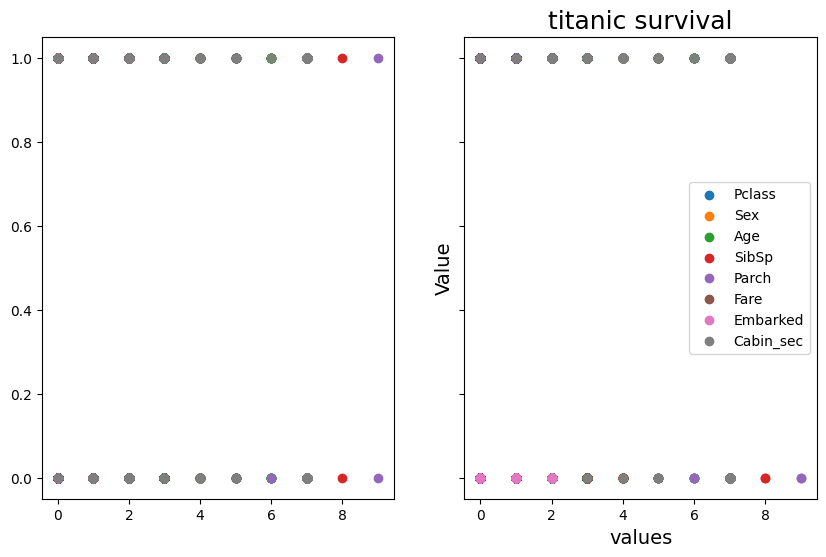

In [74]:
# this is graph from Naive Bayes ,generated same way as  of knn above
fig , (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize = (10, 6))



columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Cabin_sec']

y = abc['Survived'].values

for col in columns:
    x = test[col].values
    ax1.scatter(x, y, label=col,cmap='rainbow')

plt.title('titanic survival', fontsize=18)
plt.xlabel('values', fontsize=14)
plt.ylabel('Value', fontsize=14)

columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Cabin_sec']

y = np.array(prediction)

for col in columns:
    x = test[col].values
    ax2.scatter(x, y, label=col,cmap='rainbow')

plt.title('titanic survival', fontsize=18)
plt.xlabel('values', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend()
plt.show()



so now we draw heatmap and use only most co-related data FOR BOTH KNN AND NAIVE BAYES

<Axes: >

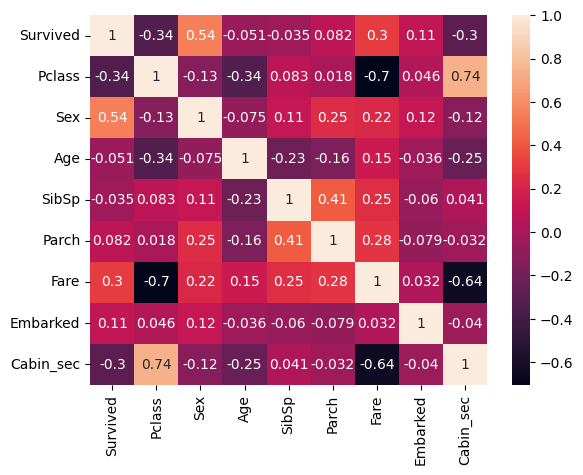

In [75]:
corr = train.corr() 
sns.heatmap(corr, annot=True) # this is to draw heatmap which is used to tell correlation among features and labels; basically it 
                              #gives info for e.g. which features for label has more weight or more important for the decision and 
                              # also we can remove unwanted/less affecting features  

In [76]:
# here only the features that are most correlated are taken into account

X_train=train.iloc[:, [2,6,7]].values  #now test ,train defination is done like train_test split is done. here coloumn having index2,6,7 a
                                                 #are part of X_train model i.e. values in these coloumn will be the features for governing the result
y_train= train.iloc[:, 0].values 
X_test= test.iloc[:, [1,5,6]].values # here values prescribed will be used to calculate the result
y_test=abc.iloc[:,1].values # abc  has the ans which should be equal to predicted_answers from X_test
clf = KNN(k=7)  #here we called the knn algorithm where k=7 is sent
clf.fit(X_train, y_train)  #here we called the function fit which will be used like training the model i.e. these values will help in providing the answers for X_test feaures
predictions = clf.predict(X_test) # here predict function is called and X_test values rae passed for classification

print(predictions) # final values are printed
acc = np.sum(predictions == y_test) / len(y_test) # here accuracy is calculated
print(acc)

[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 

In [77]:
#now using different(most correalted) X_train,y_train,X_test,y_test error rate is calculated for max accuracy
error_rate = []
for i in range(1, 40):
    knn = KNN(k=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
error_rate

[0.15550239234449761,
 0.15550239234449761,
 0.12200956937799043,
 0.14354066985645933,
 0.14354066985645933,
 0.14354066985645933,
 0.023923444976076555,
 0.023923444976076555,
 0.023923444976076555,
 0.023923444976076555,
 0.03588516746411483,
 0.023923444976076555,
 0.03588516746411483,
 0.03588516746411483,
 0.03349282296650718,
 0.028708133971291867,
 0.03588516746411483,
 0.01674641148325359,
 0.03588516746411483,
 0.01674641148325359,
 0.050239234449760764,
 0.0215311004784689,
 0.05502392344497608,
 0.03588516746411483,
 0.03588516746411483,
 0.03588516746411483,
 0.04784688995215311,
 0.04784688995215311,
 0.04784688995215311,
 0.04784688995215311,
 0.04784688995215311,
 0.04784688995215311,
 0.04784688995215311,
 0.03588516746411483,
 0.03588516746411483,
 0.03588516746411483,
 0.04784688995215311,
 0.03349282296650718,
 0.03349282296650718]

Text(0, 0.5, 'Error Rate')

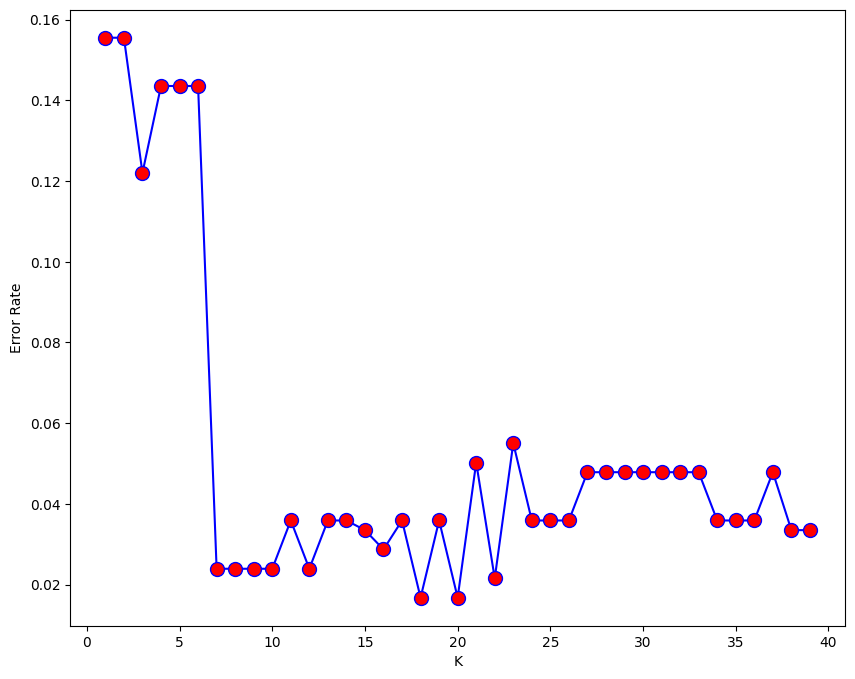

In [78]:
#here graph is plotted for the calculation of error rate done above using most correlated  training features
plt.figure(figsize=(10, 8))
plt.plot(range(1, 40), error_rate, color='blue', marker='o', markersize = 10, markerfacecolor = 'red')
plt.xlabel("K")
plt.ylabel("Error Rate")

now taking n=20

In [79]:
X_train=train.iloc[:, [2,6,7]].values  #now test ,train defination is done like train_test split is done. here coloumn having index 2,6,7 a
                                                 #are part of X_train model i.e. values in these coloumn will be the features for governing the result
y_train= train.iloc[:, 0].values 
X_test= test.iloc[:, [1,5,6]].values # here values prescribed will be used to calculate the result
y_test=abc.iloc[:,1].values # abc  has the ans which should be equal to predicted_answers from X_test
clf = KNN(k=20)  #here we called the knn algorithm where k=20 is sent(acc to above graph)
clf.fit(X_train, y_train)  #here we called the function fit which will be used like training the model i.e. these values will help in providing the answers for X_test feaures
predictions = clf.predict(X_test) # here predict function is called and X_test values rae passed for classification

print(predictions) # final values are printed
acc = np.sum(predictions == y_test) / len(y_test) # here accuracy is calculated
print(acc)

[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 

NAIVE BAYES

In [80]:
from naive_bayes import NaiveBayes
nb = NaiveBayes()
nb.fit(X_train, y_train)
prediction = nb.predict(X_test)
print(prediction)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 1 0 1 0 0 0]


In [81]:
acc = np.sum(prediction == y_test) / len(y_test) # here accuracy is calculated
print(acc)

0.9425837320574163
